# Prediction of Silica in Concentrate


In order to know impurity of an ore concentrate, samples must be examined in the laboratory, which means that it takes at least one hour for the process engineers to have this value.
<br>
The goal of this project is to check if it's possible to predict % Silica in Concentrate without using % Iron Concentrate column (as they are highly correlated).

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

pd.set_option('max_columns', None)

In [3]:
#importing the data
path = 'MiningProcess_Flotation_Plant_Database.csv'
raw_data = pd.read_csv(path, sep= ',', decimal = ',')
raw_data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


The *% Iron Feed* and *% Silica Feed* columns are quality measures of the iron ore pulp right before it is fed into the flotation plant.
<br>
The *Starch Flow*, *Amina Flow*, *Ore Pulp Flow*, *Ore Pulp pH*, *Ore Pulp Density* columns are the variables that impact the ore quality in the end of the process the most.
<br>
The *Flotation Column 01 Air Flow* up to *Flotation Column 07 Air Flow* and *Flotation Column 01 Level* up to *Flotation Column 07 Level* columns contain process data, which impact ore quality as well.
<br>
The last two columns (*% Iron Concentrate* and *% Silica Concentrate*) are the final iron ore pulp quality measurement from the lab.
<br>
The **target** is to predict the *% Silica Concentrate* value without knowing the *% Iron Concentrate*.
<br>
<br>
*Starch Flow* is measured in m³/h
<br>
*Amina Flow* is measured in m³/h
<br>
*Ore Pulp Flow* is measured in t/h
<br>
*Ore Pulp pH* is measured in pH scale from 0 to 14
<br>
*Ore Pulp Density* ranges from 1 to 3 kg/cm³
<br>
*Flotation Column 01 Air Flow* up to *Flotation Column 07 Air Flow* - Air Flows that goes into the flotation cell measured in Nm³/h
<br>
*Flotation Column 01 Level* up to *Flotation Column 07 Level* - Froth level in the flotation cell measured in mm



In [4]:
print(raw_data.shape)

(737453, 24)


In [5]:
#looking for missing values
raw_data.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [6]:
#looks like we do not have missing values across the dataframe

In [7]:
#dropping date column since it is not important while predicting the % Silica Concentrate
cols_to_drop = ('date')
df = raw_data.drop(columns = cols_to_drop)
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [8]:
df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [9]:
#checking if there are any duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1171, 23)

After dropping the *date* column, there are 1171 duplicated rows in the dataset.

In [10]:
df = df.drop_duplicates()
df.shape

(736282, 23)

In [11]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,299.446217,299.914815,292.065742,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,2.573805,3.637020,30.241329,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,298.257000,298.069000,260.299750,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,299.804000,299.886000,299.486000,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,300.635000,301.785000,303.077000,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


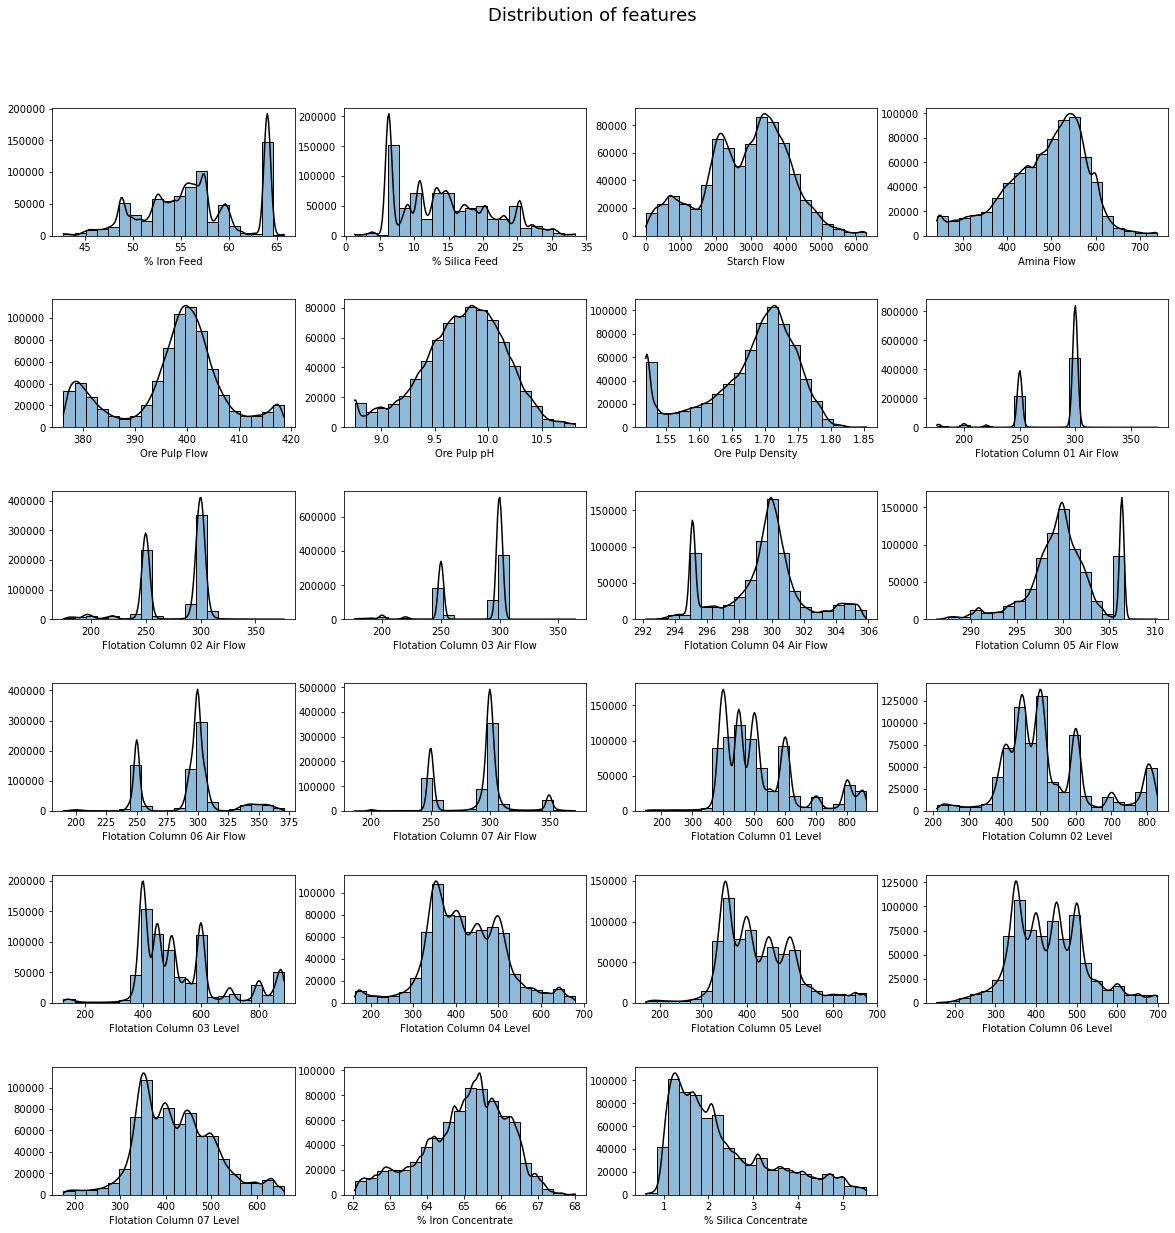

In [12]:
features = df.columns
plt.figure(figsize= (20,20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of features", fontsize=18, y=0.95)
for i, feature in enumerate(features):
 k = i + 1
 plt.subplot(6,4,int(k))
 sns.histplot(data = df, x= feature,kde=True, bins = 20).lines[0].set_color('black')
 plt.xlabel(feature)
 plt.ylabel("")
plt.show()


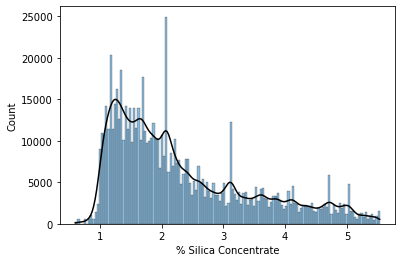

In [13]:
sns.histplot(data = df, x = "% Silica Concentrate", kde = True).lines[0].set_color('black')

Text(0.5, 0, '%')

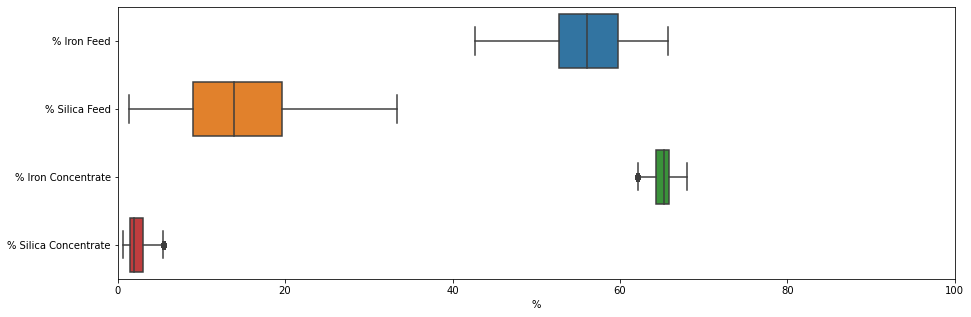

In [14]:
#box plots of Iron Feed and Silica Feed
plt.figure(figsize = (15, 5))
sns.boxplot(data = df[['% Iron Feed', '% Silica Feed','% Iron Concentrate','% Silica Concentrate']], orient = 'h').set(xlim = (0, 100))
plt.xlabel('%')

Text(0.5, 0, 'Nm³/h')

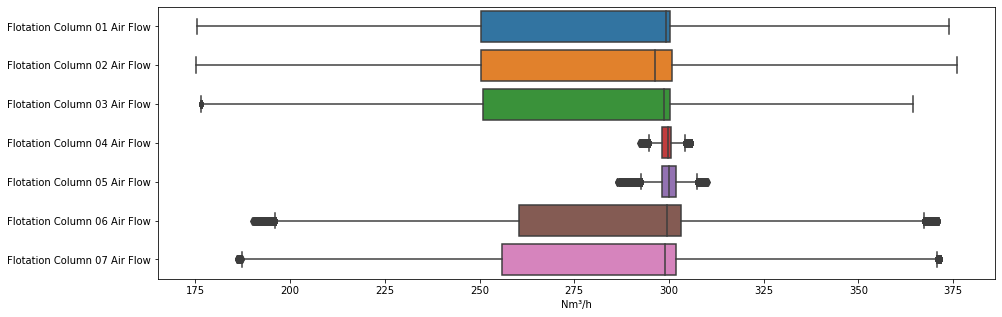

In [15]:
#box plots of Air Flows
plt.figure(figsize = (15, 5))
sns.boxplot(data = df[['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow']], orient = 'h')
plt.xlabel('Nm³/h')

Text(0.5, 0, 'mm')

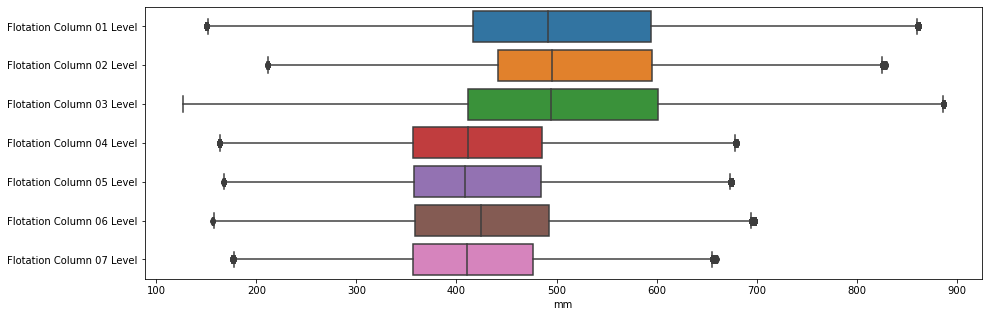

In [16]:
#box plots of Froth Levels
plt.figure(figsize = (15, 5))
sns.boxplot(data = df[['Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level']], orient = 'h')
plt.xlabel('mm')

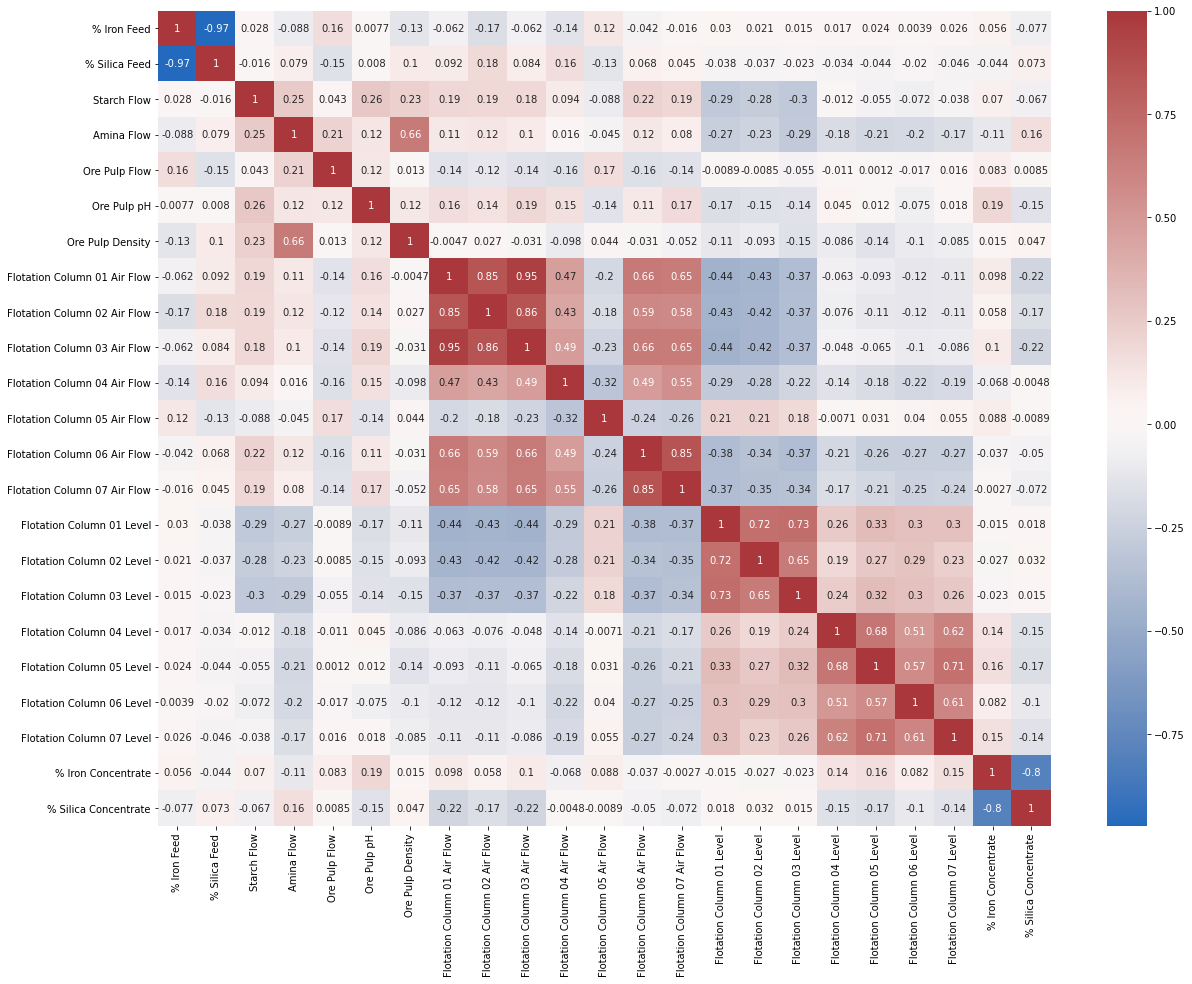

In [17]:
plt.figure(figsize = (20, 15))
_ = sns.heatmap(df.corr(), annot = True, cmap= 'vlag')

The target variable *% Silica Concentrate* is highly corelated with *% Iron Concentrate* as expected, therefore I will drop the *% Iron Concentrate* column for the model.



In [18]:
df = df.drop(columns = ['% Iron Concentrate'])
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,1.31


In [19]:
X = df.iloc[:, 0:21]
y = df.iloc[:, 21:]

#splitting the data into training, validation and test set
#training set will be used to train the models
#validation set will be used to choose the mode
#test set will be used to check the performance of the chosen model on new data
X_train, X_, y_train, y_ = train_test_split(X, y, train_size = 0.6, random_state = 42, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = 42)
print(f'The shape of X_train is {X_train.shape}\nThe shape of X_val is {X_val.shape}\nThe shape of X_test is {X_test.shape}\nThe shape of y_train is {y_train.shape}\nThe shape of y_val is {y_val.shape}\nThe shape of y_test is {y_test.shape}')

The shape of X_train is (441769, 21)
The shape of X_val is (147256, 21)
The shape of X_test is (147257, 21)
The shape of y_train is (441769, 1)
The shape of y_val is (147256, 1)
The shape of y_test is (147257, 1)


In [20]:
#scale/normalize the training data (z-score normalization)
#In the interest of preventing information about the distribution of the test set leaking into the model i will fit the scaler on the training data only 
#and then standardize training, validation and test sets with that scaler.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [21]:
#dummy regressor
#Using a dummy regressor to create a baseline model. This regressor is useful as a simple baseline to compare with other (real) regressors.
dummy = DummyRegressor(strategy = 'mean')
dummy.fit(X_train, y_train)

DummyRegressor()

In [22]:
dummy_preds = dummy.predict(X_val)

In [23]:
dummy_rmse = mean_squared_error(y_val, dummy_preds, squared = False) #squared = False returns RMSE (Root Mean Squared Error)
dummy_rmse

1.123974305203036

In [24]:
#i have to build models that perform better than dummy regressor

In [25]:
# Model 1. Linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [26]:
lr_preds = lr_model.predict(X_val)

In [27]:
lr_rmse = mean_squared_error(y_val, lr_preds, squared = False)
lr_rmse

1.0349214442597656

In [28]:
#Linear Regression model performs better than dummy regressor, let's see the performance of another models.

In [29]:
# Model 2. Stochastic Gradient Descent
sgd_model = SGDRegressor() #parameters are default
sgd_model.fit(X_train, y_train)
print(sgd_model)
print(f"number of iterations completed: {sgd_model.n_iter_}, number of weight updates: {sgd_model.t_}")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor()
number of iterations completed: 7, number of weight updates: 3092384.0


In [30]:
sgd_preds = sgd_model.predict(X_val)

In [31]:
sgd_rmse = mean_squared_error(y_val, sgd_preds, squared = False)
sgd_rmse

1.0375248829295034

In [32]:
results = pd.DataFrame({'Actual': y_val.values.ravel(), 'Predicted': sgd_preds})
print(results)

        Actual  Predicted
0         1.41   2.125465
1         1.30   2.406634
2         1.53   2.556562
3         1.38   2.190198
4         4.13   2.294360
...        ...        ...
147251    1.08   1.921687
147252    1.43   1.524456
147253    2.52   2.691642
147254    1.59   2.505454
147255    1.69   1.587712

[147256 rows x 2 columns]


In [33]:
# Model 3. Random Forest Regressor
rf = RandomForestRegressor(n_jobs = -1, verbose = 2) #n_jobs = The number of jobs to run in parallel. -1 means using all processors, verbose parameter to have some information about how things are going when training
rf.fit(X_train, y_train.values.ravel()) # y_train.values (DF->np.array), .ravel() (N,1) shape -> (N,) shape

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.0min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.5min finished


RandomForestRegressor(n_jobs=-1, verbose=2)

In [34]:
rf_predict = rf.predict(X_val)
rf_rmse = mean_squared_error(y_val, rf_predict, squared = False)
rf_rmse

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.1s finished


0.22988197352729314

In [35]:
comparison = pd.DataFrame({'Model': ['Linear Regression', 'SGDRegressor', 'Random Forest'],
                           'RMSE': [lr_rmse, sgd_rmse, rf_rmse]}, columns = ['Model', 'RMSE'])
comparison

,Model,RMSE
0,Linear Regression,1.034921
1,SGDRegressor,1.037525
2,Random Forest,0.229882


Feature: 0, Score: 0.10615
Feature: 1, Score: 0.12506
Feature: 2, Score: 0.03846
Feature: 3, Score: 0.09340
Feature: 4, Score: 0.01688
Feature: 5, Score: 0.11853
Feature: 6, Score: 0.07913
Feature: 7, Score: 0.01800
Feature: 8, Score: 0.00917
Feature: 9, Score: 0.05215
Feature: 10, Score: 0.08425
Feature: 11, Score: 0.04702
Feature: 12, Score: 0.01742
Feature: 13, Score: 0.00685
Feature: 14, Score: 0.04151
Feature: 15, Score: 0.02636
Feature: 16, Score: 0.04569
Feature: 17, Score: 0.01094
Feature: 18, Score: 0.03648
Feature: 19, Score: 0.01581
Feature: 20, Score: 0.01075


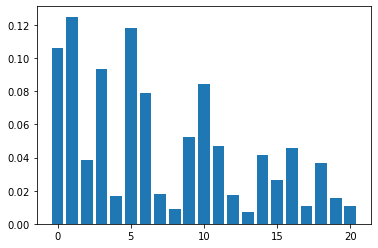

In [36]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Hyperparameter tuning

Randomized search

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 80, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
print(random_grid)

{'n_estimators': [20, 35, 50, 65, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30], 'min_samples_split': [5, 10]}


In [40]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='neg_root_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 247.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 265.2min finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 80building tree 2 of 80building tree 3 of 80building tree 4 of 80



building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min


building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, verbose=2),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 35, 50, 65, 80]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [38]:
import os
import joblib
#joblib.dump(rf_random, "RF_compressed.joblib", compress=3)  # compression is ON!
#print(f"Compressed Random Forest: {np.round(os.path.getsize('RF_compressed.joblib') / 1024 / 1024, 2) } MB")
loaded_rf = joblib.load("RF_compressed.joblib")

In [39]:
loaded_rf.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=80,
                      n_jobs=-1, verbose=2)

In [40]:
loaded_rf.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [41]:
random_best= loaded_rf.best_estimator_.predict(X_val)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    1.9s finished


In [42]:
rf_preds_best = mean_squared_error(y_val, random_best, squared = False)
rf_preds_best

0.23922561291253105

In [43]:
#final validation on test set
random_best_testset = loaded_rf.best_estimator_.predict(X_test)
rf_preds_best_testset = mean_squared_error(y_test, random_best_testset, squared = False)
rf_preds_best_testset


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    1.7s finished


0.24237984045287267